# Yijun Wang
### 2020/02/09

## Note for parameter
- Generation period value is taken from reference 1 and 2
- p value is taken from People's Daily Weibo. https://m.weibo.cn/u/2803301701
- R0 model refers to reference 3

## Reference
- 1. Li, Q., Guan, X., et al. (2020, January 29). Early Transmission Dynamics in Wuhan, China, of Novel Coronavirus–Infected Pneumonia. The New England Journal of Medicine. https://www.nejm.org/doi/full/10.1056/NEJMoa2001316#article_references

- 2. Wu, Joseph T., et al. (2020, January 28). Nowcasting and Forecasting the potential domestic and International Spread of the 2019-nCoV Outbreak Originating in Wuhan, China: a Modeling Study. Lancet.https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext

- 3. Zhou Tao, Liu, Y., et al. (2020, January 29). Preliminary Prediction of the Basic Repreduction Number of the Novel Coronavirus 2019-nCoV http://kns.cnki.net/kcms/detail/51.1656.r.20200204.1640.002.html

In [ ]:
# load data
import requests
import pandas as pd

url = 'https://lab.isaaclin.cn/nCoV/api/overall?latest=0'
r = requests.request('GET', url)
data = r.json()
df = pd.DataFrame.from_records(data['results'])
from datetime import datetime
import pandas

# date
df['t'] = pandas.to_datetime(df['updateTime']/1000,unit='s')
import datetime
df = df.resample('D', on = 't').max()
df['date'] = df['t'].dt.date

In [27]:
# R0
import math
import numpy
from array import *
import matplotlib.pyplot as plt

# generation period or serial interval (Wu, 2020; Li, 2020)
Tg = 7.5

# days: 疾病已爆发时间
import datetime
df['days'] = (df['updateTime']/1000 - datetime.datetime(2019,12,1,0,0,0).timestamp())/60/60/24

def R0Func(confirm, suspect,t):
    # confirm是确诊人数；susp是疑似人数；t是疾病已爆发时间
    # p为疑似病例转化为确诊病例的概率
    p = 41/59 # 人民日报微博
    # yt为实际预估感染人数
    Yt = suspect * p + confirm
    # lamda预估感染人数的增长率
    lamda = math.log(Yt)/t
    R0 = 1 + lamda * Tg + p * (1 - p) * pow(lamda * Tg, 2)
    return R0

df['R0'] = df.apply(lambda x: R0Func(x['confirmedCount'], x['suspectedCount'], x['days']), axis = 1)

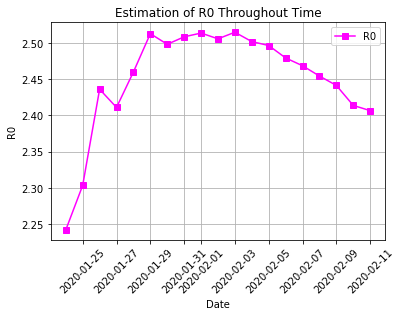

In [26]:
# graph
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(df['date'], df['R0'], color = 'magenta',label = 'R0', marker = 's')
plt.title('Estimation of R0 Throughout Time')
plt.legend()
plt.grid()
plt.xlabel('Date')
plt.ylabel('R0')
plt.xticks(rotation = 45)
plt.show()
